In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145B21B29B0>,
      dtype=object)

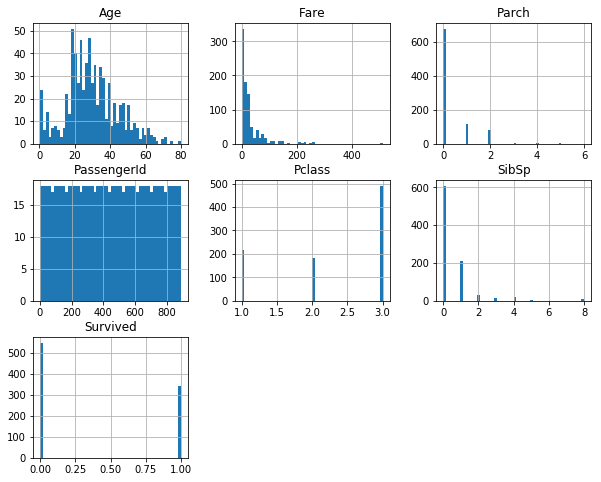

In [4]:
train.hist(bins=50, figsize=(10,8))

In [8]:
train.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [727]:
data = train.append(test, sort= True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [728]:
data.reset_index(inplace = True, drop = True)
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


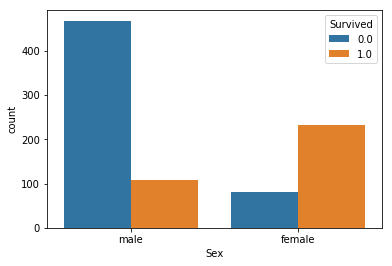

In [729]:
sns.countplot(data['Sex'], hue = data['Survived'])

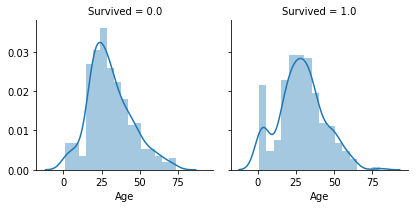

In [730]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Age')

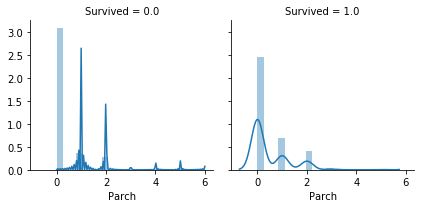

In [731]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'Parch')

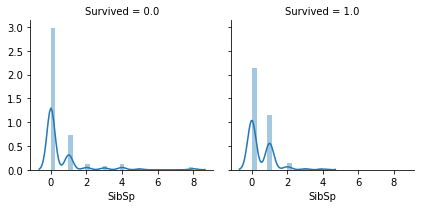

In [732]:
g = sns.FacetGrid(data, col = 'Survived')
g.map(sns.distplot, 'SibSp')

In [733]:
data['Family_size'] = data['Parch'] + data['SibSp']

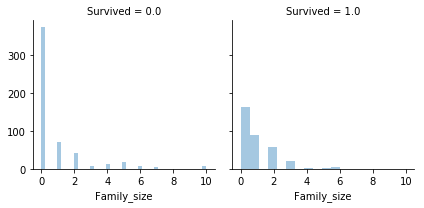

In [734]:
g = sns.FacetGrid(data, col= 'Survived')
g.map(sns.distplot, 'Family_size', kde= False)

# Feature Engineering

In [735]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [736]:
data['Title1'] = data["Name"].str.split(", ", expand = True)[1]

In [737]:
data['Title1'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title1, dtype: object

In [738]:
data['Title1'] = data['Title1'].str.split('.', expand = True)[0]

In [739]:
data['Title1'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title1, dtype: object

In [740]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [741]:
pd.crosstab(data['Title1'], data['Sex']).T.style.background_gradient(cmap = 'summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [742]:
pd.crosstab(data['Title1'], data['Survived']).T.style.background_gradient(cmap = 'summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [743]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [744]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [745]:
data['Title2'] = data['Title1'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'the Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                                        ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [746]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [747]:
data.groupby(['Title2', 'Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [748]:
data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [749]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".", "").replace('/', "").strip().split(' ')[0] if not x.isdigit() else 'X')

In [750]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

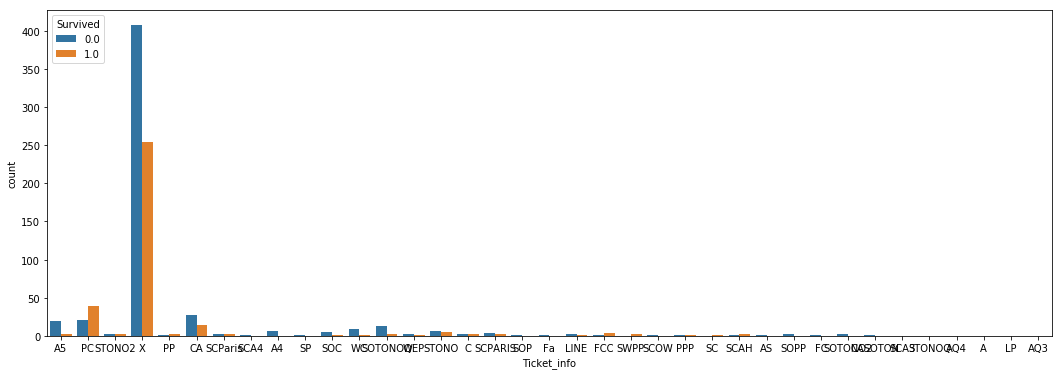

In [751]:
plt.figure(figsize=(18,6))
sns.countplot(data['Ticket_info'], hue=data['Survived'])

In [752]:
pd.crosstab(data['Survived'], data['Ticket_info']).style.background_gradient(cmap = 'summer_r')

Ticket_info,A4,A5,AS,C,CA,CASOTON,FC,FCC,Fa,LINE,PC,PP,PPP,SC,SCA4,SCAH,SCOW,SCPARIS,SCParis,SOC,SOP,SOPP,SOTONO2,SOTONOQ,SP,STONO,STONO2,SWPP,WC,WEP,X
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7,19,1,3,27,1,1,1,1,3,21,1,1,0,1,1,1,4,2,5,1,3,2,13,1,7,3,0,9,2,407
1.0,0,2,0,2,14,0,0,4,0,1,39,2,1,1,0,2,0,3,2,1,0,0,0,2,0,5,3,2,1,1,254


# Missing Value-embarked, Fare, Age

In [753]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


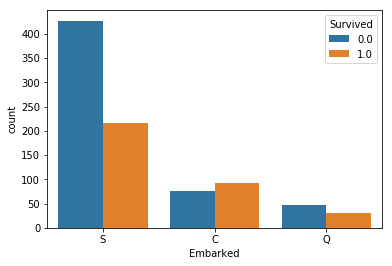

In [754]:
sns.countplot(data['Embarked'], hue=data['Survived'])

In [755]:
data['Embarked'] = data['Embarked'].fillna('S')

In [756]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [757]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [758]:
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [759]:
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

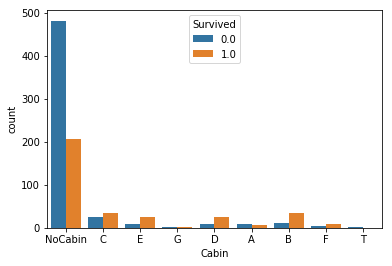

In [760]:
sns.countplot(data['Cabin'], hue = data['Survived'])

In [761]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [762]:
data['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int8

In [763]:
dataAgeNull = data[data['Age'].isnull()]
dataAgeNotNull = data[data['Age'].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull['Fare'] - dataAgeNotNull['Fare'].mean()) < (4* dataAgeNotNull['Fare'].std()))]
remove_outlier = remove_outlier[(np.abs(remove_outlier['Family_size'] - remove_outlier['Family_size'].mean()) < (4* remove_outlier['Family_size'].std()))]

In [764]:
rfModel_age = RandomForestRegressor(n_estimators=2000, random_state= 42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Title1', 'Title2', 'Cabin', 'Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier['Age'])
ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull['Age'] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace = True, drop = True)

C:\Users\AQ1648\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [765]:
dataTrain = data[data['Survived'].notnull()].sort_values(by = ['PassengerId'])
dataTest = data[data['Survived'].isnull()].sort_values(by= ['PassengerId'])

In [766]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [767]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Title2', 'Ticket_info', 'Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_size', 'Title2', 'Ticket_info', 'Cabin']]

# Model training 

In [768]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1, oob_score=True, criterion='gini', min_samples_leaf=1, min_samples_split=12)
rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print(rf.oob_score_)

0.8316498316498316


In [769]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']),
         pd.DataFrame(rf.feature_importances_, columns= ['importance'])), axis=1).sort_values(by= 'importance', ascending = False)

,variable,importance
2,Fare,0.215014
0,Age,0.161989
4,Sex,0.134079
3,Pclass,0.128238
8,Cabin,0.120436
5,Family_size,0.101161
6,Title2,0.063213
7,Ticket_info,0.050306
1,Embarked,0.025565


# Submit

In [770]:
rf_res = rf.predict(dataTest)
gender_submission['Survived'] = rf_res
gender_submission['Survived'] = gender_submission['Survived'].astype(int)
gender_submission.to_csv('submit5.csv', index = False)

NameError: name 'cat' is not defined